In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('E_Commerce_Dataset.csv')

In [3]:
dataset.head(5)

,CustomerID,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure,Churn
0,50001,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,4.0,1
1,50002,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121,NaN,1
2,50003,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120,NaN,1
3,50004,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,0.0,1
4,50005,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130,0.0,1


In [4]:
print(dataset.shape)

(5630, 20)


# count the no of customer in the churn and not churn class

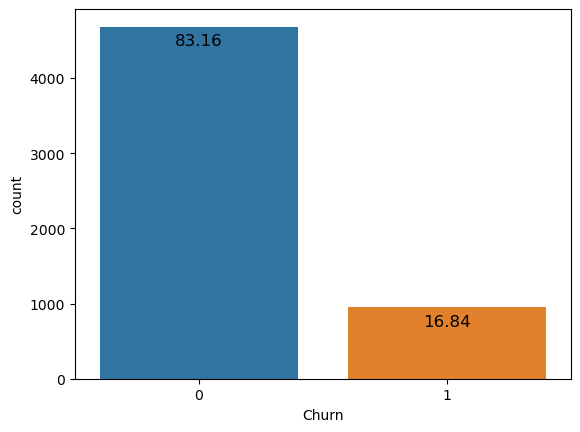

In [6]:
ax = sns.countplot(x='Churn', data=dataset)
for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.show()

There are more retained than churned customers, the ratio of retained to churned is approximately 5 to 1, so the churn rate is very low, which is normal therefore making the data imbalanced.

# Distribution of the Tenure of the customers on the platform

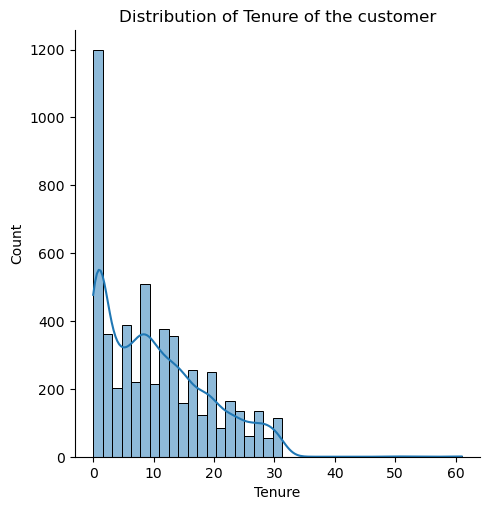

In [7]:
sns.displot(x='Tenure', kde=True, data=dataset)
plt.title("Distribution of Tenure of the customer")
plt.show()

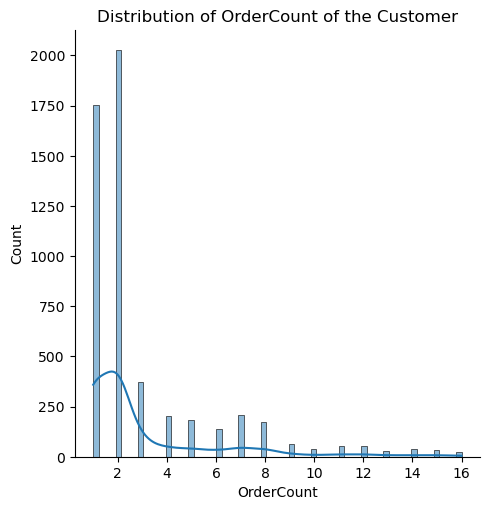

In [8]:
sns.displot(x='OrderCount', kde=True, data=dataset)
plt.title("Distribution of OrderCount of the Customer")
plt.show()

Distribution of Recency of the customers
Recency is gotten from the day since last order of each customer. Customers with low number of days since last order are recent customers and vice versa

# Distribution of Recency of customer orders

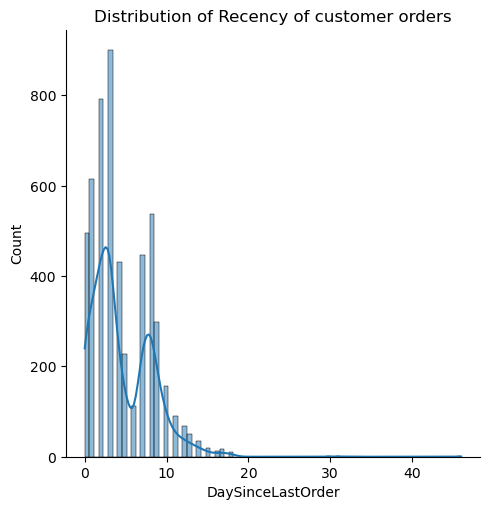

In [9]:
sns.displot(x='DaySinceLastOrder', kde=True, data=dataset)
plt.title("Distribution of Recency of customer orders")
plt.show()

Distribution of Amount returned for money spent by customers
Cashback is a reward that refunds a percentage of the money spent to by a customer to him/her, It is usually dependent on the amount spent, so the cashback column can be used in place of the amount spent columns.

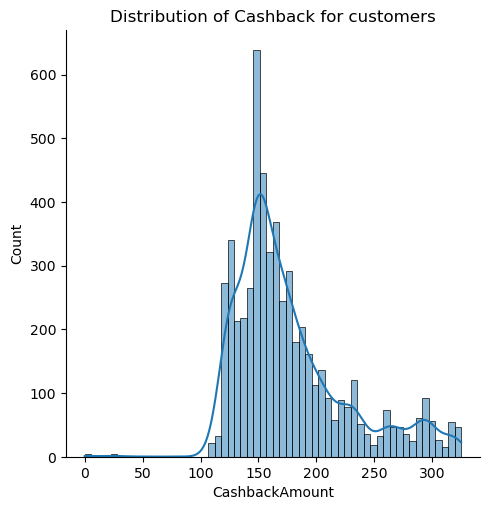

In [10]:
sns.displot(x='CashbackAmount',kde=True, data=dataset)
plt.title('Distribution of Cashback for customers')
plt.show()

# Distribution of distance of Warehouse to customers home

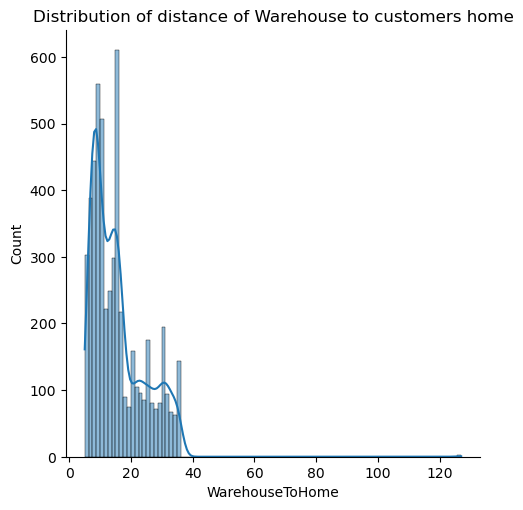

In [11]:
sns.displot(x='WarehouseToHome', kde=True, data=dataset)
plt.title("Distribution of distance of Warehouse to customers home")
plt.show()

# Distribution of Percentage increase in customer orders

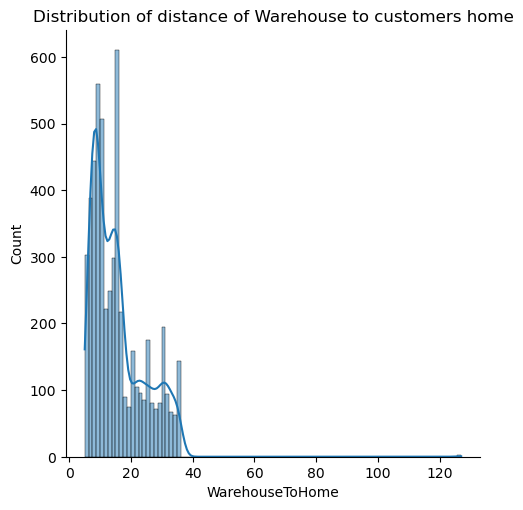

In [12]:
sns.displot(x='WarehouseToHome', kde=True, data=dataset)
plt.title("Distribution of distance of Warehouse to customers home")
plt.show()

# Distribution of Percentage increase in customer orders

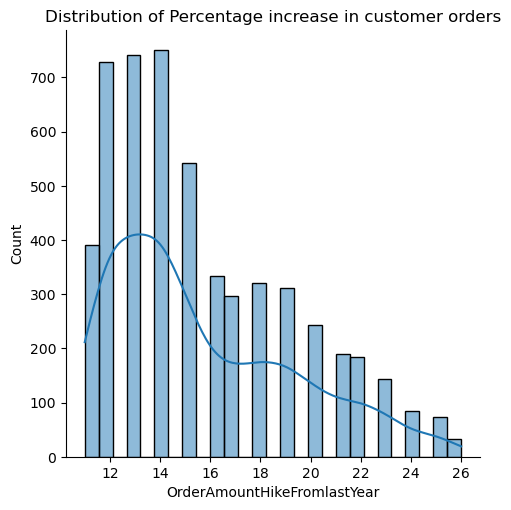

In [13]:
sns.displot(x='OrderAmountHikeFromlastYear', kde=True, data=dataset)
plt.title("Distribution of Percentage increase in customer orders")
plt.show()

# Distribution of Hours spent on the app by the customers

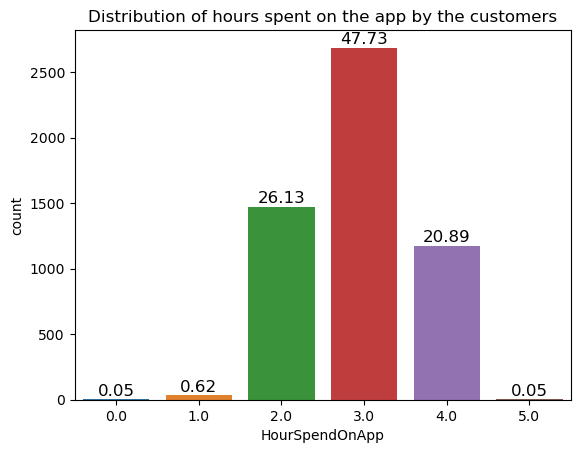

In [14]:
axx = sns.countplot(x='HourSpendOnApp', data=dataset)
for a in axx.patches:
    axx.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, 6),textcoords='offset points')
plt.title("Distribution of hours spent on the app by the customers")
plt.show()

# Distribution Satisfaction score for churned and retained customers

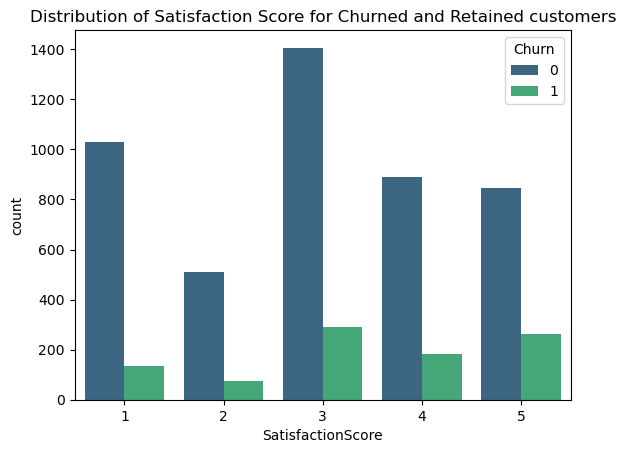

In [15]:
sns.countplot(x='SatisfactionScore', hue='Churn', palette='viridis', data=dataset)
plt.title("Distribution of Satisfaction Score for Churned and Retained customers")
plt.show()

# Distribution of Gender for churned and retained customers

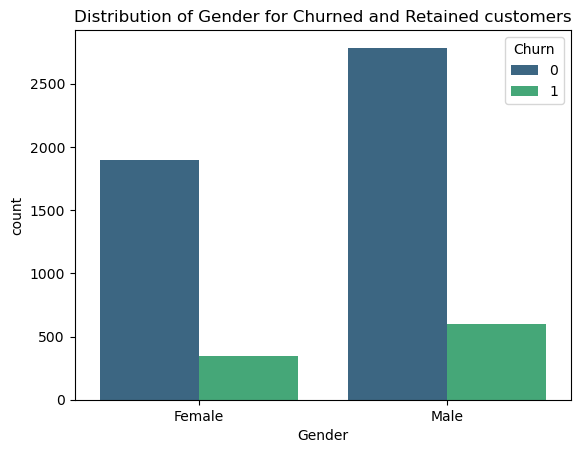

In [16]:
sns.countplot(x='Gender', hue='Churn', palette='viridis', data=dataset)
plt.title("Distribution of Gender for Churned and Retained customers")
plt.show()

# Distribution of marital status for churned and retained customers

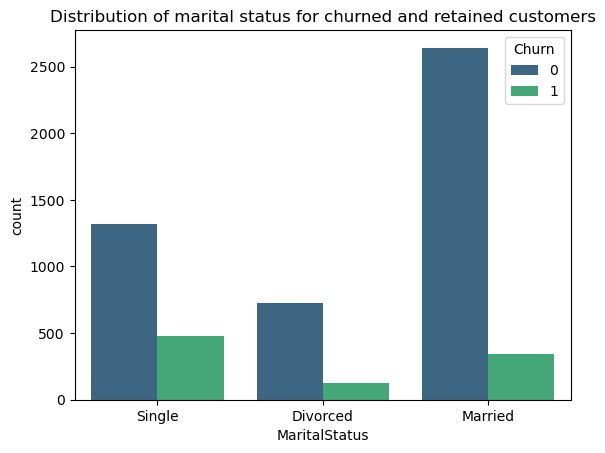

In [17]:
sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=dataset)
plt.title("Distribution of marital status for churned and retained customers")
plt.show()

# Distribution of complain for churned and retained customers

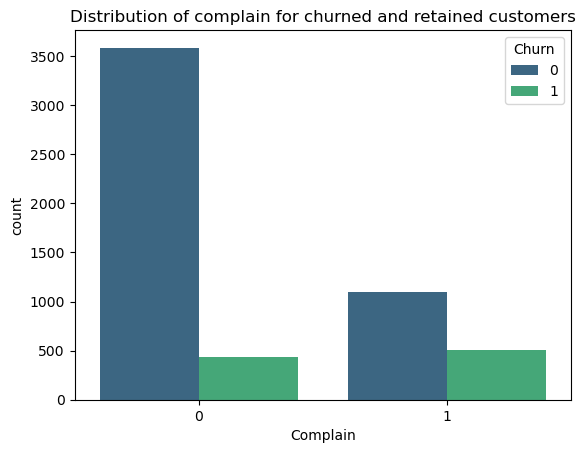

In [18]:
sns.countplot(x='Complain', hue='Churn', palette='viridis', data=dataset)
plt.title("Distribution of complain for churned and retained customers")
plt.show()

# Relationship between the Tenure and Churn rate

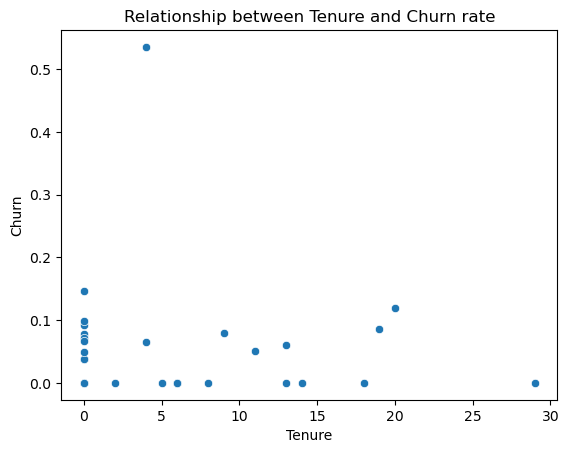

In [19]:
sns.scatterplot(x=dataset['Tenure'],y=dataset.groupby('Tenure').Churn.mean())
plt.title("Relationship between Tenure and Churn rate")
plt.show()

# Relationship between the Order Count and Churn rate

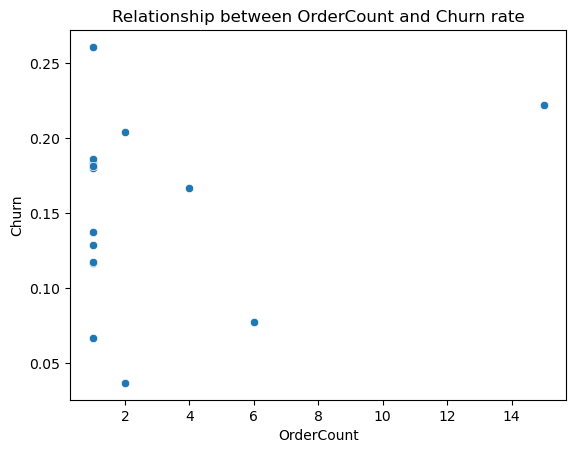

In [20]:
sns.scatterplot(x=dataset['OrderCount'],y=dataset.groupby('OrderCount').Churn.mean())
plt.title("Relationship between OrderCount and Churn rate")
plt.show()

# Relationship between the Coupon Used and Churn rate

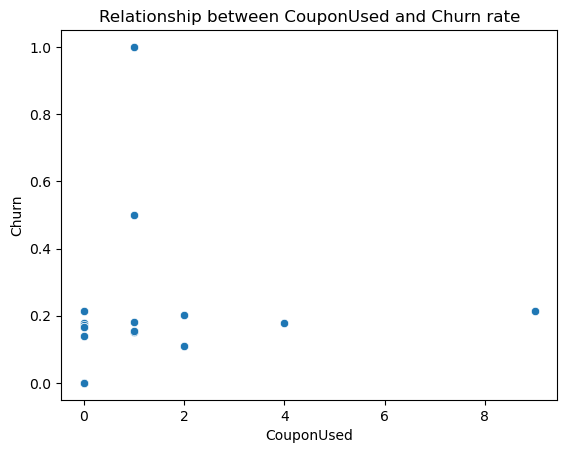

In [21]:
sns.scatterplot(x=dataset['CouponUsed'],y=dataset.groupby('CouponUsed').Churn.mean())
plt.title("Relationship between CouponUsed and Churn rate")
plt.show()

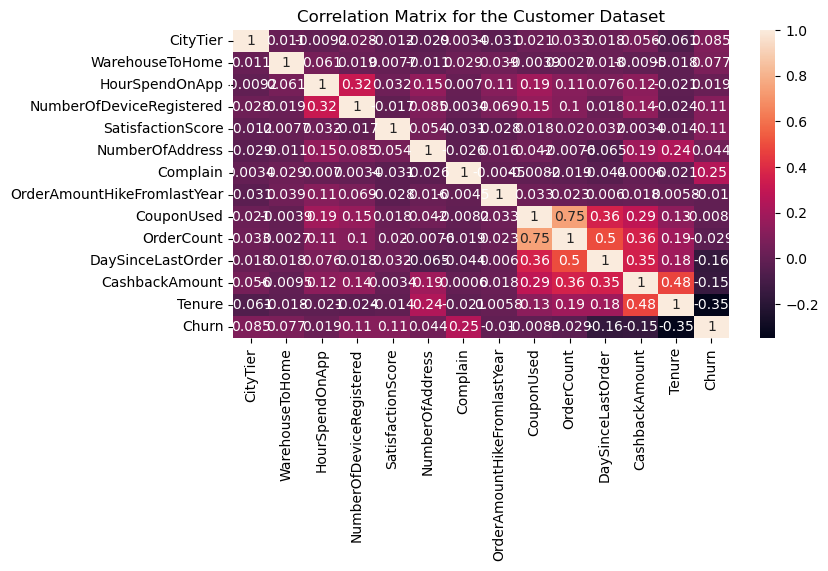

In [22]:
plt.figure(figsize=(8,4))
sns.heatmap(dataset.drop('CustomerID',axis=1).corr(), annot=True)
plt.title("Correlation Matrix for the Customer Dataset")
plt.show()

# Findings From the Analysis:

The Tenure, Days since last order, cashback amount, and warehouse to home features have outliers, but the outliers don't have huge impact on tree models, which will be my final model so I will keep them. Most of the customers spend 3 hours on the app, and 94.75% of the customers spend between 2 and 4 hours on the app Single people have higher churn rate than other Marital Status Customers with complain have higher churn rate than customers without complain From the scatterplot there is a relationship between tenure and the churn rate as there is a churn rate of 0.5 between 4 and 5 Tenure.